# Skew Analysis - dynein knockdown


In [1]:
#Notebook Setup
import sys
sys.path.append('/Volumes/albright_postdoc/2022_AADAWM_v3/bin')
import utils as ut # <----- your commmonly used functions go here!
import plots as pt
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# read sleuth matrix 
df = pd.read_csv('/Volumes/albright_postdoc/dynein/bin/log_sleuth_matrix.csv').rename(columns={'Unnamed: 0': 'gene'}).set_index('gene')

In [3]:
df

,con1A,con1P,con2A,con2P,con3A,con3P,con4A,con4P,con5A,con5P,...,G0511A,G0511P,G0512A,G0512P,G0513A,G0513P,G0514A,G0514P,G0515A,G0515P
gene,,,,,,,,,,,,,,,,,,,,,
SteCoe_1,3.991140,3.959623,4.246663,3.199033,3.965849,3.520252,4.363007,4.064801,4.219427,3.491350,...,4.644602,4.587983,4.334076,4.127681,4.541418,4.499281,4.485177,4.427199,4.625356,4.321098
SteCoe_10,3.465882,3.429909,3.264884,3.020101,3.583933,3.386498,2.993543,2.922432,3.542479,3.535558,...,3.621357,3.584616,3.400985,3.346820,3.686619,3.618164,3.413853,3.596177,3.243818,3.423634
SteCoe_100,1.154422,1.113461,1.146175,1.344786,1.064603,1.092473,1.225276,1.183206,1.264532,0.855056,...,0.825974,0.956856,0.901129,0.886257,0.977400,0.975286,0.601184,0.860468,0.717263,0.892287
SteCoe_1000,4.896607,4.748374,3.865083,3.485406,4.381386,3.905930,4.396975,4.449070,4.305953,4.405938,...,4.670462,4.439605,4.623808,4.352125,4.610823,4.637300,5.061549,4.576680,5.007063,4.707926
SteCoe_10000,0.333962,0.180894,0.089370,0.000000,0.050283,0.177509,0.209944,0.315082,0.249387,0.099758,...,0.189861,0.148780,0.101657,0.149968,0.035615,0.111924,0.148353,0.255819,0.042457,0.146301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SteCoe_9995,3.137509,3.128075,3.259151,3.319851,3.410596,3.545623,2.736690,3.141276,3.076125,3.317294,...,3.273289,2.788760,3.175521,3.275907,3.483019,3.451837,3.749764,3.108530,3.590973,2.990229
SteCoe_9996,0.411800,0.375408,0.466534,0.820737,0.405502,0.666817,0.283379,0.428397,0.521654,0.480391,...,0.461453,0.588679,0.424670,0.524145,0.526261,0.565372,0.242563,0.589508,0.388646,0.506210
SteCoe_9997,0.000000,0.000000,0.000000,0.000000,0.000000,0.248459,0.054679,0.000000,0.050005,0.000000,...,0.000000,0.083214,0.074290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Quality Control - PCA 

Calculating the PC space here on the control only

<AxesSubplot:xlabel='PC1, 3314.84%', ylabel='PC2, 2013.24%'>

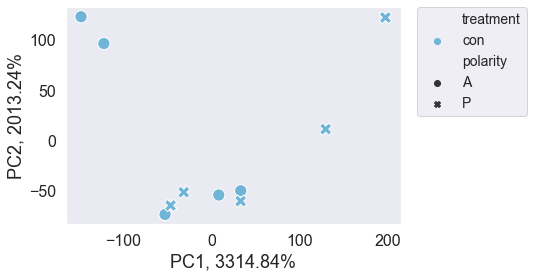

In [4]:
# compute pca:
control_cols = df.columns[df.columns.str.contains('con')]
scaler, pca = ut.get_pc(df[control_cols], n_pcs=2, which='pca')
pc = ut.get_pc(df[control_cols], n_pcs=2, which='pc') 
explained_variance = pca.explained_variance_ratio_ * 100  # convert to percentage

pt.plot_pc(pc, explained_variance, colors = ['#70B4D6'])

#plt.savefig('PCA_control_dyn.png', bbox_inches='tight', dpi = 300)

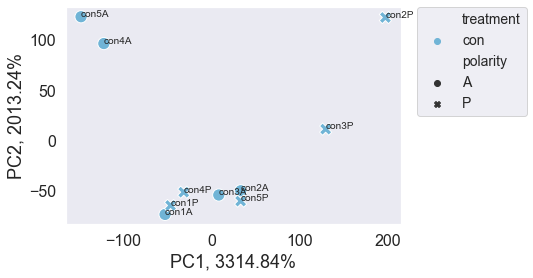

In [5]:
# same plot, samples labeled 
pt.plot_pc(pc, explained_variance, colors = ['#70B4D6'])
for sample in pc.index:
    s = pc.reindex([sample])
    plt.annotate(sample, (s.PC1, s.PC2))


#plt.savefig('PCA_control.png', bbox_inches='tight', dpi = 300)

Note: PC1 resembles the anterior-posterior axis overall trending more A on the left, and P on the right. By cell, the anterior is always left of its posterior pair. 

Cell-to-cell variation is most likely a result of variation in where the cell is cut.

Transform the rest of the dataset:

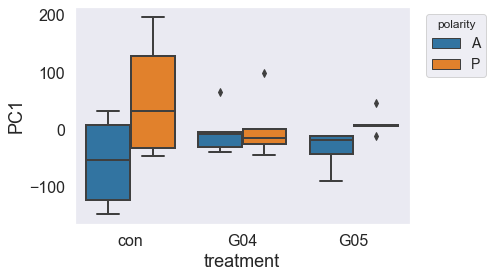

In [6]:
coords2 = pca.transform(scaler.transform(df.T))  # Transform the entire dataset using control PC space from above

# get coordinates into a nice dataframe
pc = pd.DataFrame(coords2, index=df.columns, columns=['PC1', 'PC2'])

# annotate metadata:
pc['treatment'] = pd.Series(pc.index).astype(str).str[:3].values
pc['polarity'] = pd.Series(pc.index).astype(str).str[-1].values
sns.boxplot(x='treatment', y='PC1', hue='polarity', data=pc)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
legend.set_title("polarity")


#plt.savefig('PC1_dyn.png', bbox_inches='tight', dpi = 300)

In [7]:
colors = ['#70B4D6', '#BBAC5E','#CC6677']

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

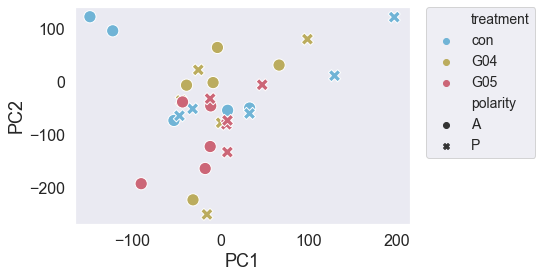

In [8]:
# PCA all samples
pt.plot_pc(pc, colors = colors)
#plt.savefig('PCA_dyn.png', bbox_inches='tight', dpi = 300)

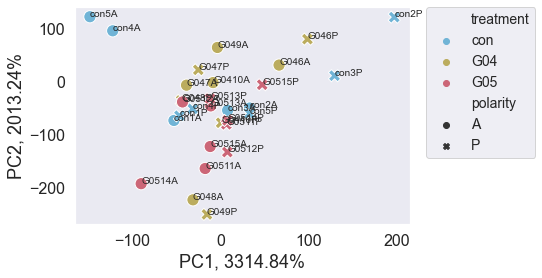

In [9]:
# PCA, samples labeled 
pt.plot_pc(pc, explained_variance, colors=colors)
for sample in pc.index:
    s = pc.reindex([sample])
    plt.annotate(sample, (s.PC1, s.PC2))

## Data wrangling and math 

In [10]:
stack = ut.tidy_up(df)
stack.head()

,,Sample,log1TPM,treatment,Polarity,sample_mean_log1TPM,log1RPM,log1RPM_posterior,sample_mean_log1TPM_posterior,Skew
gene,Cell_ID,,,,,,,,,
SteCoe_1,con1,con1A,3.991140,con,A,1.568282,5.559422,5.529318,1.569695,0.002715
SteCoe_10,con1,con1A,3.465882,con,A,1.568282,5.034164,4.999604,1.569695,0.003444
SteCoe_100,con1,con1A,1.154422,con,A,1.568282,2.722704,2.683156,1.569695,0.007316
SteCoe_1000,con1,con1A,4.896607,con,A,1.568282,6.464889,6.318069,1.569695,0.011486
SteCoe_10000,con1,con1A,0.333962,con,A,1.568282,1.902244,1.750590,1.569695,0.041517


/Users/aralbright/opt/anaconda3/envs/scoe-rna/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aralbright/opt/anaconda3/envs/scoe-rna/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aralbright/opt/anaconda3/envs/scoe-rna/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

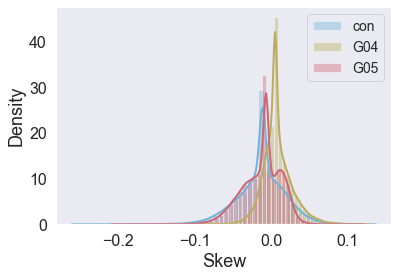

In [11]:
# visualize a histogram of mean skews.
mean_skews = ut.get_mean_skew(stack)

sns.distplot(mean_skews[mean_skews.treatment == 'con'].Skew, color = '#70B4D6', label = 'con')
sns.distplot(mean_skews[mean_skews.treatment == 'G04'].Skew, color = '#BBAC5E', label = 'G04')
sns.distplot(mean_skews[mean_skews.treatment == 'G05'].Skew, color = '#CC6677', label = 'G05')
plt.legend()

#plt.savefig('skew_dist_dyn.png', bbox_inches='tight', dpi = 300)

(0.0, 0.1)

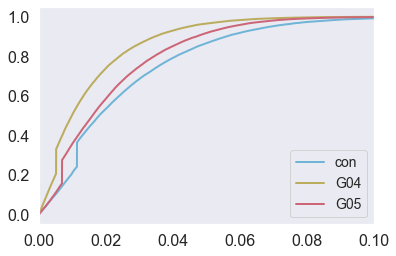

In [12]:
abs_cond = lambda x: np.abs(mean_skews[mean_skews.treatment == x].Skew)
plt.plot(*ut.ecdf(abs_cond('con')), color = '#70B4D6', label = 'con')
plt.plot(*ut.ecdf(abs_cond('G04')), color = '#BBAC5E', label = 'G04')
plt.plot(*ut.ecdf(abs_cond('G05')), color = '#CC6677', label = 'G05')
plt.legend()
plt.xlim(0, .1)



26281


/Users/aralbright/opt/anaconda3/envs/scoe-rna/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aralbright/opt/anaconda3/envs/scoe-rna/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

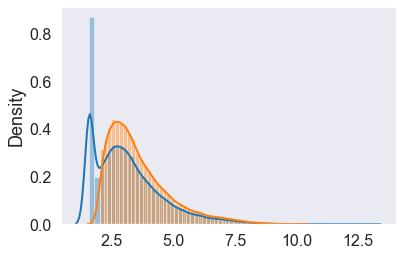

In [13]:
# make sure RPMs are within a reasonable range:
mean_rpm = stack.groupby('gene')[['log1RPM_posterior', 'log1RPM']].mean().mean(axis=1)
wanted = mean_rpm[mean_rpm.between(2, 10)].index
print(len(wanted))
sns.distplot(mean_rpm)
sns.distplot(mean_rpm[mean_rpm.between(2, 10)])

In [14]:
# compute coefficient of variation(std / mean) so we don't test things that are
# so variable that they would never be stat sig differentially expressed
# therefore reducing our FDR penalty

stack = stack.reset_index()[stack.reset_index().gene.isin(wanted)]
stack['coeff'] = stack.groupby(['gene', 'treatment']).Skew\
                            .transform(lambda x: np.std(x) / np.abs(np.mean(x)))
stack.sort_values(['gene', 'Cell_ID'], inplace=True)
stack.head()

,gene,Cell_ID,Sample,log1TPM,treatment,Polarity,sample_mean_log1TPM,log1RPM,log1RPM_posterior,sample_mean_log1TPM_posterior,Skew,coeff
172470,SteCoe_1,G0410,G0410A,4.637975,G04,A,1.564265,6.202239,5.988895,1.558626,0.017500,1.168904
206964,SteCoe_1,G046,G046A,4.534673,G04,A,1.575318,6.109991,5.825334,1.588103,0.023850,1.168904
241458,SteCoe_1,G047,G047A,4.186466,G04,A,1.576354,5.762820,5.610255,1.588309,0.013415,1.168904
275952,SteCoe_1,G048,G048A,4.347528,G04,A,1.566884,5.914413,6.012707,1.561393,-0.008241,1.168904
310446,SteCoe_1,G049,G049A,4.592032,G04,A,1.594817,6.186850,6.158427,1.502464,0.002302,1.168904


/Users/aralbright/opt/anaconda3/envs/scoe-rna/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'log(Coefficent of Variation)')

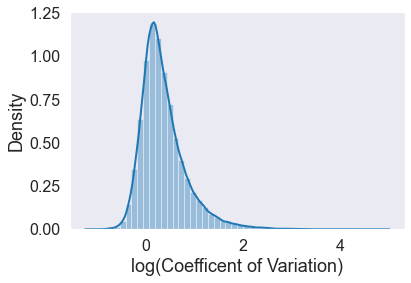

In [15]:
sns.distplot(stack.coeff.apply(np.log10))
plt.xlabel('log(Coefficent of Variation)')

In [16]:
# remove genes where the coefficient of variation is >2 
stacky = stack[stack.coeff < 2]

### Dynein 1 (G04) Analysis

In [17]:
df_G04 = ut.sig_test(stacky, qval_threshold = 0.1, pc_index=1)

Number of genes:  6069


/Users/aralbright/opt/anaconda3/envs/scoe-rna/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='q_value', ylabel='Density'>

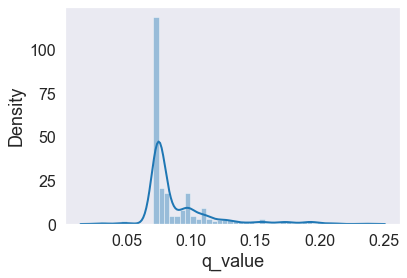

In [18]:
sns.distplot(df_G04['q_value'])

In [19]:
# Keep only rows where the 'gene' column value is unique
# Keep only the first occurrence of each unique 'gene' value
df_G04 = df_G04.drop_duplicates(subset='gene', keep='first')

In [20]:
df_G04[df_G04.sig]

,gene,Cell_ID,Sample,log1TPM,treatment,Polarity,sample_mean_log1TPM,log1RPM,log1RPM_posterior,sample_mean_log1TPM_posterior,Skew,coeff,p_value,q_value,sig
172586,SteCoe_10119,G0410,G0410A,5.746475,G04,A,1.564265,7.310739,7.227861,1.558626,0.005701,1.984538,0.0508555,0.0799615,True
172772,SteCoe_1032,G0410,G0410A,2.538897,G04,A,1.564265,4.103162,4.273431,1.558626,-0.020327,1.604087,0.0325257,0.0741601,True
172897,SteCoe_10449,G0410,G0410A,2.204489,G04,A,1.564265,3.768753,3.373065,1.558626,0.055404,0.646119,0.0535744,0.082707,True
173035,SteCoe_10580,G0410,G0410A,0.640843,G04,A,1.564265,2.205108,2.137723,1.558626,0.015516,1.304302,0.0383309,0.0756993,True
173039,SteCoe_10584,G0410,G0410A,0.950098,G04,A,1.564265,2.514363,2.513345,1.558626,0.000202,1.185871,0.00837086,0.0741601,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206539,SteCoe_9578,G0410,G0410A,1.056834,G04,A,1.564265,2.621099,2.474701,1.558626,0.028729,0.900930,0.00402455,0.0741601,True
206669,SteCoe_9703,G0410,G0410A,0.514212,G04,A,1.564265,2.078477,1.965910,1.558626,0.027833,0.465078,0.0341709,0.0741601,True
206686,SteCoe_9721,G0410,G0410A,1.655474,G04,A,1.564265,3.219739,3.038240,1.558626,0.029003,1.394176,0.0219986,0.0741601,True
206842,SteCoe_9875,G0410,G0410A,1.444676,G04,A,1.564265,3.008941,2.631073,1.558626,0.066998,1.562756,0.0634761,0.0909399,True


Add protein domain info: 

In [21]:
# load protein domain information 

x = []
y = []
with open('/Users/aralbright/Documents/GitHub/2022_skew_analysis/S_coeruleus_Nov2017_proteins.fasta') as f:
    lines = f.readlines()
    for l in lines:
        if '>' in l:
            line = l.split('\t')
            gene = line[0][1:]
            domain = line[1].strip()
            x += [gene]
            y += [domain]

prot_data = pd.DataFrame([x, y], index=['gene', 'domain']).T.set_index('gene')

In [22]:
df_G04 = df_G04.join(prot_data, on = 'gene')

In [23]:
df_G04.to_csv('df_G04_allskew.csv', index=False)

In [24]:
df_G04_sig = df_G04[df_G04.sig]

In [25]:
#df_G04_sig.to_csv('df_G04_sig.csv', index = False)

# G05

In [26]:
df_G05 = ut.sig_test(stacky, qval_threshold = 0.2, condition='G05', pc_index = 1)

Number of genes:  10716


In [27]:
# Keep only rows where the 'gene' column value is unique
# Keep only the first occurrence of each unique 'gene' value
df_G05 = df_G05.drop_duplicates(subset='gene', keep='first')

/Users/aralbright/opt/anaconda3/envs/scoe-rna/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='q_value', ylabel='Density'>

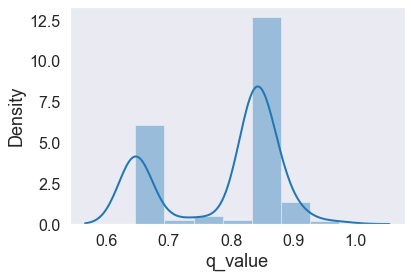

In [28]:
sns.distplot(df_G05['q_value'])

In [29]:
df_G05[df_G05.sig]

,gene,Cell_ID,Sample,log1TPM,treatment,Polarity,sample_mean_log1TPM,log1RPM,log1RPM_posterior,sample_mean_log1TPM_posterior,Skew,coeff,p_value,q_value,sig


## Heatmap

In [30]:
hm_df = stack.pivot(index='gene', columns='Cell_ID', values='Skew')

In [31]:
dyn_cm_order = pd.read_csv('/Volumes/albright_postdoc/2022_AADAWM_v3/1_bulk_ap/dyn_cm_order.csv')

In [32]:
hm_df_filtered = hm_df[hm_df.index.isin(dyn_cm_order['gene'])]
hm_df_ordered = hm_df_filtered.reindex(dyn_cm_order['gene'])

In [33]:
hm_df_ordered_nog05= hm_df_ordered.loc[:, ~hm_df_ordered.columns.str.startswith('G05')]

In [34]:
hm_df_ordered_nog05

Cell_ID,G0410,G046,G047,G048,G049,con1,con2,con3,con4,con5
gene,,,,,,,,,,
SteCoe_37629,0.003584,0.014093,0.019875,0.012034,-0.005745,0.027644,-0.060157,-0.018889,-0.051570,-0.053589
SteCoe_37670,0.010190,0.027776,-0.000178,0.007045,0.012949,0.016067,0.054144,0.034752,0.037315,0.043692
SteCoe_14797,0.021630,0.009647,-0.002354,0.002738,0.007810,0.007264,0.065975,0.033216,0.025652,0.049974
SteCoe_26400,0.017483,0.032334,0.009502,-0.003061,-0.012928,0.001369,0.089483,0.038178,0.039121,0.058019
SteCoe_4300,0.015812,0.055885,0.001369,0.012965,0.046087,0.018431,0.081535,0.082076,0.081179,0.114106
...,...,...,...,...,...,...,...,...,...,...
SteCoe_26266,0.006562,0.030561,0.009084,-0.024563,0.210684,-0.018877,-0.126951,-0.032918,-0.044274,-0.153223
SteCoe_4980,-0.022432,0.039470,0.051388,0.026218,0.110713,0.003989,-0.059393,-0.066652,-0.036646,-0.052556
SteCoe_9875,0.066998,-0.014152,-0.016272,0.015829,0.168440,0.023371,-0.061438,-0.085914,-0.014881,-0.095031


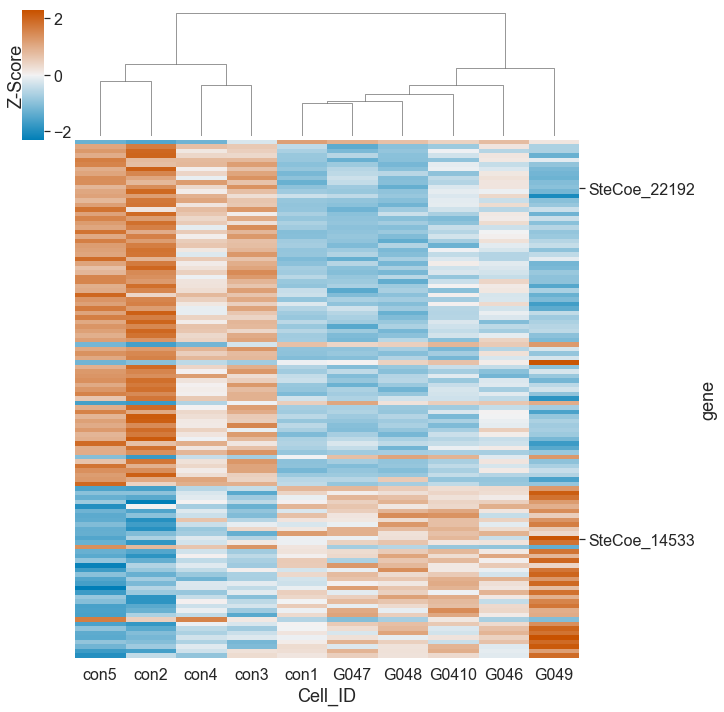

In [35]:
palette = sns.diverging_palette(240, 24, s = 100, l = 50, as_cmap=True)

p = sns.clustermap(hm_df_ordered_nog05, 
                   z_score=0, 
                   cmap = palette, 
                   row_cluster = False,
                   dendrogram_ratio=(0.1, 0.2),
                  )

# just to make the order matchy with other hms 
p.ax_heatmap.invert_xaxis()
p.ax_col_dendrogram.invert_xaxis()

# get reordered labels from the dendrogram
reordered_labels = hm_df_ordered_nog05.index.tolist() 

# genes to label 
use_labels = ['SteCoe_22192', 'SteCoe_14533']
use_ticks = [reordered_labels.index(label) + 0.5 for label in use_labels]

# set labels
p.ax_heatmap.set(yticks=use_ticks, yticklabels=use_labels)

# color bar position and such 
cbar = p.ax_cbar
cbar_pos = cbar.get_position()
cbar.set_ylabel('Z-Score') # Set the label for the colorbar
cbar.yaxis.set_label_coords(-0.7, 0.5) 
cbar.set_position([cbar_pos.x0, cbar_pos.y0, 0.03, cbar_pos.height])


#plt.savefig('dyn_ap_overlap_ordered.png', bbox_inches='tight', dpi=300)

## Single gene plots

<AxesSubplot:title={'center':'SteCoe_22192'}, xlabel='treatment', ylabel='Skew'>

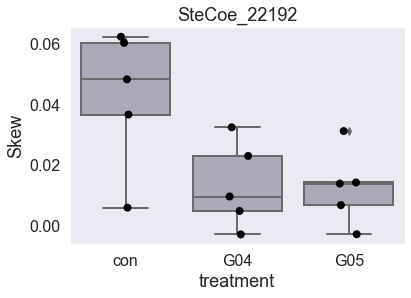

In [36]:
hit = "SteCoe_22192"

x_order = ['con', 'G04', 'G05']

sns.boxplot(data = stack[stack.gene == hit], x = 'treatment', y = 'Skew', color = ('#A9A5BA'), order = x_order).set(title = hit)
sns.stripplot(data = stack[stack.gene == hit], x = 'treatment', y = 'Skew', color = "black", size = 8, order = x_order)


#plt.ylim(-0.12, 0.05)

#plt.savefig('dyn_SteCoe_22192.png', bbox_inches='tight', dpi = 300)


<AxesSubplot:title={'center':'SteCoe_14533'}, xlabel='treatment', ylabel='Skew'>

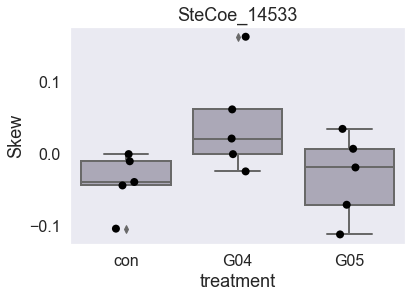

In [37]:
hit = "SteCoe_14533"

x_order = ['con', 'G04', 'G05']

sns.boxplot(data = stack[stack.gene == hit], x = 'treatment', y = 'Skew', color = ('#A9A5BA'), order = x_order).set(title = hit)
sns.stripplot(data = stack[stack.gene == hit], x = 'treatment', y = 'Skew', color = "black", size = 8, order = x_order)


#plt.savefig('dyn_SteCoe_14533.png', bbox_inches='tight', dpi = 300)
